# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad'

In [5]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        record= record + 1
        
        time.sleep(1.01)
    
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Emerald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=emerald
Processing Record 2 | Vung Tau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=vung tau
Processing Record 3 | Pacifica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=pacifica
Processing Record 4 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=port alfred
Processing Record 5 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=jamestown
Processing Record 6 | Mattru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=mattru
Processing Record 7 | Simao
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 57 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=cape town
City not found. Skipping...
City not found. Skipping...
Processing Record 58 | Narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=narsaq
Processing Record 59 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=avarua
Processing Record 60 | Coolum Beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=coolum beach
Processing Record 61 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=guerrero negro
City not found. Skipping...
Processing Record 62 | Toropets
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=toropets
Processing Record 63 | Souillac
http:/

Processing Record 112 | Hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=hamilton
City not found. Skipping...
Processing Record 113 | Belton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=belton
Processing Record 114 | Martapura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=martapura
City not found. Skipping...
Processing Record 115 | Mopipi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=mopipi
Processing Record 116 | Russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=russell
Processing Record 117 | Santiago del Estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=santiago del estero
Processing Record 118 | Ilulissat
http://api.openweathermap.

Processing Record 168 | Morozovsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=morozovsk
Processing Record 169 | Launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=launceston
Processing Record 170 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=carnarvon
Processing Record 171 | Hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=hasaki
Processing Record 172 | Tabou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=tabou
Processing Record 173 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=nuuk
Processing Record 174 | Vrangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=vrang

Processing Record 224 | Borgo San Dalmazzo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=borgo san dalmazzo
Processing Record 225 | Bridlington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=bridlington
Processing Record 226 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=geraldton
Processing Record 227 | Camalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=camalu
Processing Record 228 | Dauriya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=dauriya
City not found. Skipping...
Processing Record 229 | Vieques
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=vieques
Processing Record 230 | Mumford
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 279 | Mount Pleasant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=mount pleasant
Processing Record 280 | Chitipa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=chitipa
Processing Record 281 | Vredendal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=vredendal
Processing Record 282 | Yoichi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=yoichi
Processing Record 283 | Harer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=harer
Processing Record 284 | Salto del Guaira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=salto del guaira
Processing Record 285 | Tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846

Processing Record 335 | Herat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=herat
Processing Record 336 | Ampanihy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=ampanihy
Processing Record 337 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=cidreira
Processing Record 338 | Verkhnyaya Inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=verkhnyaya inta
Processing Record 339 | Havre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=havre
Processing Record 340 | Shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=shingu
Processing Record 341 | Dali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=

Processing Record 390 | Turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=turukhansk
Processing Record 391 | Sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=sobolevo
Processing Record 392 | Quzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=quzhou
Processing Record 393 | Oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=oktyabrskiy
Processing Record 394 | The Valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=the valley
City not found. Skipping...
Processing Record 395 | Ordu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=ordu
Processing Record 396 | Nelson Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 445 | Ponta Delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=ponta delgada
Processing Record 446 | Chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=chapais
City not found. Skipping...
City not found. Skipping...
Processing Record 447 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=camacha
Processing Record 448 | Pringsewu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=pringsewu
City not found. Skipping...
Processing Record 449 | Nokaneng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=nokaneng
City not found. Skipping...
Processing Record 450 | Punta Alta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=punta alta
Proces

Processing Record 501 | Zeven
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=zeven
Processing Record 502 | Constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=constitucion
Processing Record 503 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=half moon bay
Processing Record 504 | Tulsa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=tulsa
Processing Record 505 | Yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=yarmouth
City not found. Skipping...
Processing Record 506 | Marystown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b365491de7846d9e7ea9cc7b3c8ac7ad&q=marystown
Processing Record 507 | Dongsheng
http://api.openweathermap.org/data/2.5/weather?units=Imperia

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

weather_data = pd.DataFrame(weatherpy_dict)

weather_data.count()



City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [13]:
weather_data.to_csv("weather_data.csv", encoding="utf-8", index=False)

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Emerald,75,AU,1553553214,83,-23.53,148.16,78.80,8.05
1,Vung Tau,100,VN,1553553546,96,10.35,107.08,81.75,19.93
2,Pacifica,90,US,1553553391,87,37.61,-122.49,61.00,17.22
3,Port Alfred,88,ZA,1553552071,89,-33.59,26.89,66.00,1.01
4,Jamestown,0,AU,1553553550,68,-33.21,138.60,60.06,6.73


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

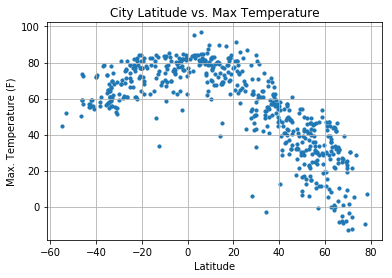

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Temp.png")

plt.show()

#### Latitude vs. Humidity Plot

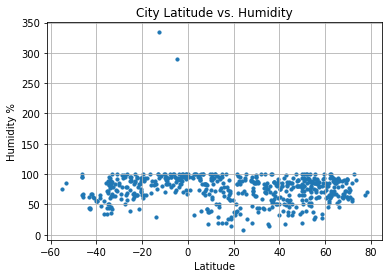

In [18]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

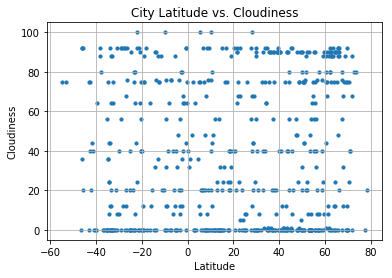

In [19]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

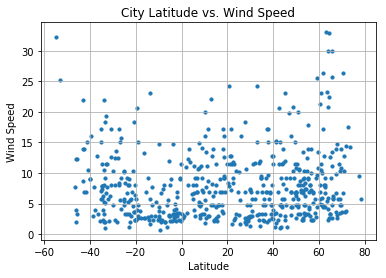

In [20]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Wind Speed.png")

plt.show()